In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kkhandekar_cheapest_electric_cars_path = kagglehub.dataset_download('kkhandekar/cheapest-electric-cars')

print('Data source import complete.')


Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_1 = '/content/drive/MyDrive/Cheapestelectriccars-EVDatabase 2023.csv'
file_2 = '/content/drive/MyDrive/Cheapestelectriccars-EVDatabase.csv'
df = pd.read_csv(file_1)
df_2  = pd.read_csv(file_2)
data = pd.concat([df, df_2], axis=0)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             489 non-null    object
 1   Subtitle         489 non-null    object
 2   Acceleration     489 non-null    object
 3   TopSpeed         489 non-null    object
 4   Range            489 non-null    object
 5   Efficiency       489 non-null    object
 6   FastChargeSpeed  489 non-null    object
 7   Drive            489 non-null    object
 8   NumberofSeats    489 non-null    int64 
 9   PriceinGermany   450 non-null    object
 10  PriceinUK        334 non-null    object
dtypes: int64(1), object(10)
memory usage: 45.8+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             489 non-null    object
 1   Subtitle         489 non-null    object
 2   Acceleration     489 non-null    object
 3   TopSpeed         489 non-null    object
 4   Range            489 non-null    object
 5   Efficiency       489 non-null    object
 6   FastChargeSpeed  489 non-null    object
 7   Drive            489 non-null    object
 8   NumberofSeats    489 non-null    int64 
 9   PriceinGermany   450 non-null    object
 10  PriceinUK        334 non-null    object
dtypes: int64(1), object(10)
memory usage: 45.8+ KB


In [ ]:
data.nunique()

,0
Name,371
Subtitle,256
Acceleration,93
TopSpeed,41
Range,94
Efficiency,106
FastChargeSpeed,102
Drive,3
NumberofSeats,4
PriceinGermany,376


In [ ]:
# Check for missing values
print(data.isnull().sum())

Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      39
PriceinUK          155
dtype: int64


In [ ]:
data =  data.drop(['PriceinUK'],axis = 1) #dropping column with many missing values
data= data.dropna() #droping missing values

In [ ]:
data['TopSpeed'] = data['TopSpeed'].str.replace(r'\D', '', regex=True).astype(int)
data['Acceleration'] = data['Acceleration'].str.replace(r'\D', '', regex=True).astype(int)
data['Range'] = data['Range'].str.replace(r'\D', '', regex=True).astype(int)
data['Efficiency'] = data['Efficiency'].str.replace(r'\D', '', regex=True).astype(int)
data['FastChargeSpeed'] = data['FastChargeSpeed'].str.replace(r'\D', '', regex=True).replace('', pd.NA).astype('Int64')
data['PriceinGermany'] = (
    data['PriceinGermany']
    .str.replace(r'[€,]', '', regex=True)  # Remove the euro symbol (€) and commas
    .astype(int)  # Convert to integer
)

In [ ]:
# Remove duplicates
data = data.drop_duplicates()

# Check the cleaned dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 179
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             449 non-null    object
 1   Subtitle         449 non-null    object
 2   Acceleration     449 non-null    int64 
 3   TopSpeed         449 non-null    int64 
 4   Range            449 non-null    int64 
 5   Efficiency       449 non-null    int64 
 6   FastChargeSpeed  442 non-null    Int64 
 7   Drive            449 non-null    object
 8   NumberofSeats    449 non-null    int64 
 9   PriceinGermany   449 non-null    int64 
dtypes: Int64(1), int64(6), object(3)
memory usage: 39.0+ KB
None


       Acceleration    TopSpeed       Range  Efficiency  FastChargeSpeed  \
count    449.000000  449.000000  449.000000  449.000000            442.0   
mean      75.757238  179.837416  354.298441  197.481069       526.809955   
std       31.028736   40.783705  115.475086   32.896486       248.638935   
min       21.000000  123.000000   95.000000  104.000000            120.0   
25%       51.000000  150.000000  270.000000  173.000000            320.0   
50%       73.000000  175.000000  355.000000  190.000000            480.0   
75%       90.000000  200.000000  425.000000  214.000000            680.0   
max      191.000000  410.000000  970.000000  295.000000           1410.0   

       NumberofSeats  PriceinGermany  
count     449.000000      449.000000  
mean        5.244989    66497.207127  
std         0.996704    39060.685735  
min         2.000000    18460.000000  
25%         5.000000    43000.000000  
50%         5.000000    55990.000000  
75%         5.000000    71490.000000  
max

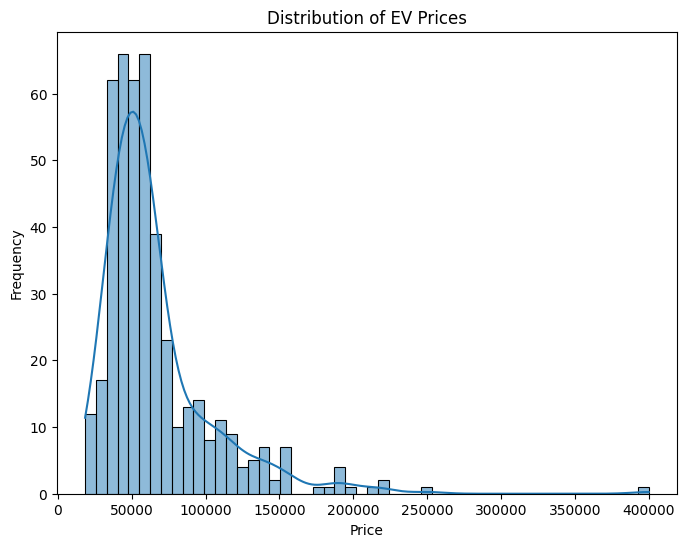

In [ ]:
# Summary statistics
print(data.describe())

# Distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(data['PriceinGermany'], kde=True)
plt.title('Distribution of EV Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

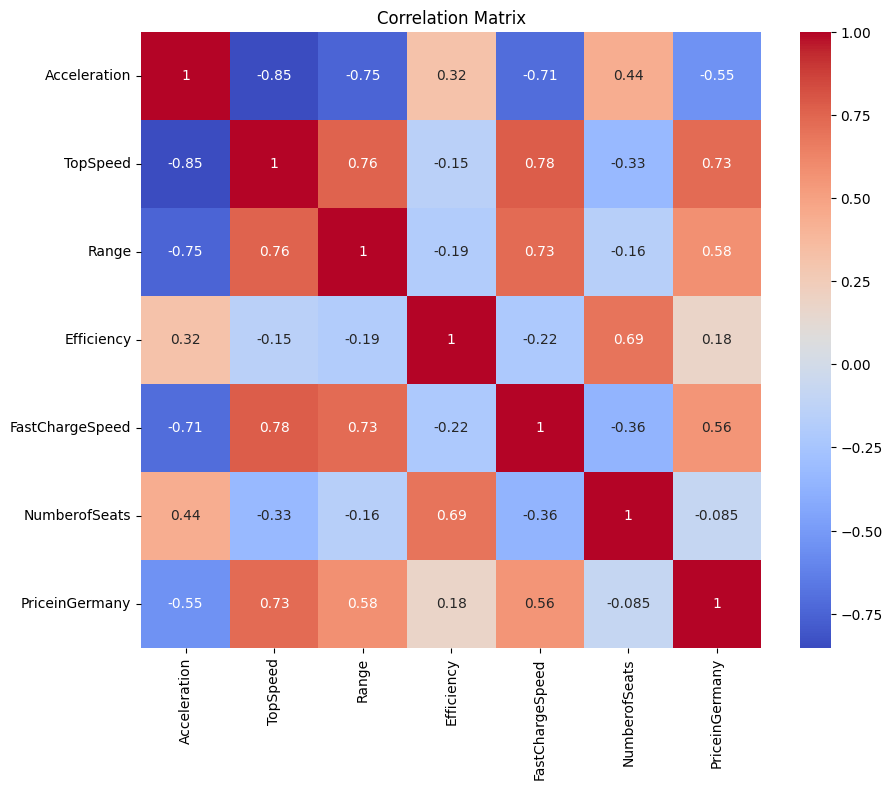

In [ ]:
numerical_features = data.select_dtypes(include = 'int').columns.tolist()
numerical_features.remove('PriceinGermany')
# Correlation matrix
corr_matrix = data[numerical_features + ['PriceinGermany']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

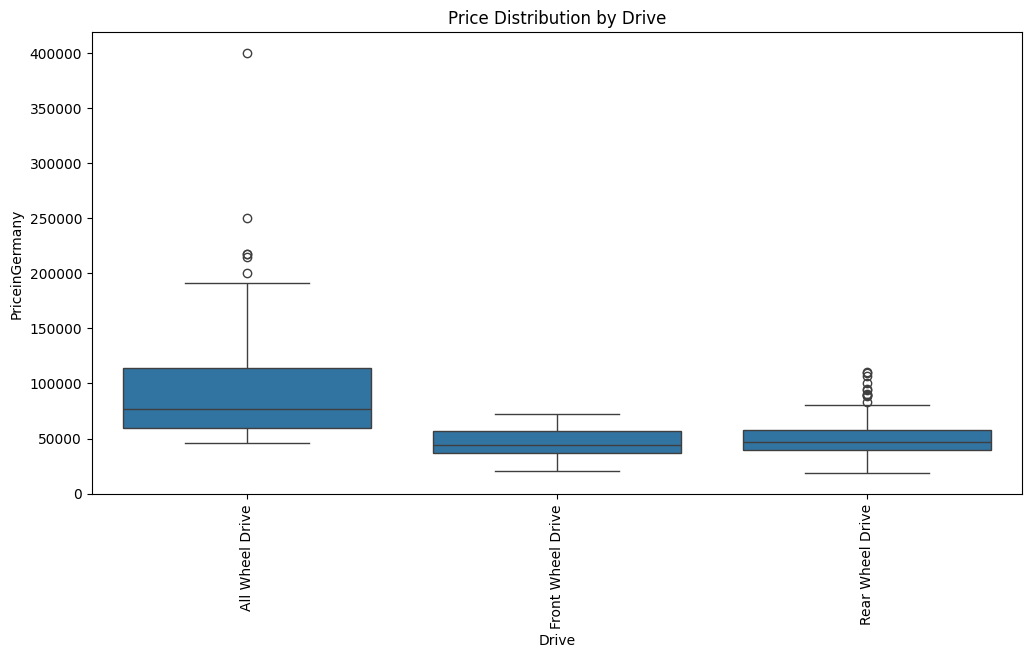

In [ ]:
# Boxplot of Price by Drive
plt.figure(figsize=(12, 6))
sns.boxplot(x='Drive', y='PriceinGermany', data=data)
plt.title('Price Distribution by Drive')
plt.xticks(rotation=90)
plt.show()

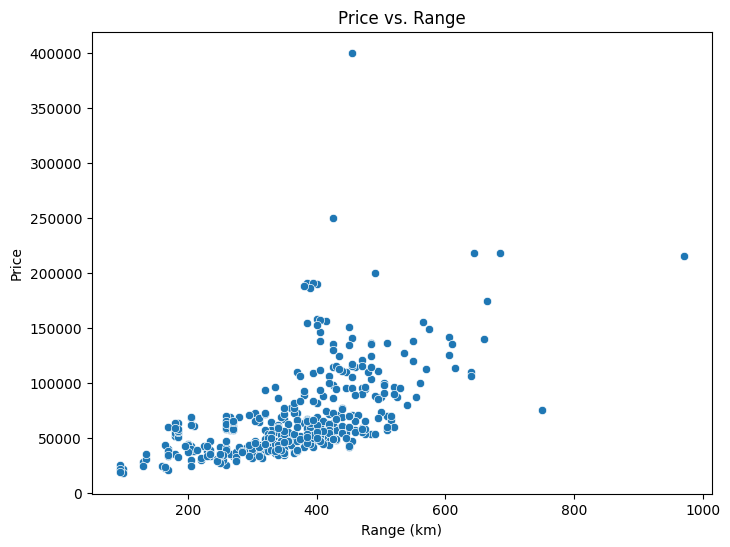

In [ ]:
# Scatterplot of Price vs. Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Range', y='PriceinGermany', data=data)
plt.title('Price vs. Range')
plt.xlabel('Range (km)')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['Acceleration', 'TopSpeed', 'Range', 'Efficiency',
                    'FastChargeSpeed',  'NumberofSeats']

# Scale training data
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data = data.dropna()

In [ ]:
label_encoder = LabelEncoder()
cols = ['Acceleration', 'Drive']
for column in cols:
    data [column] = label_encoder.fit_transform(data[column])
data = data.drop(['Name', 'Subtitle'], axis = 1)

In [ ]:
y   = data['PriceinGermany']
X =  data.drop(['PriceinGermany'], axis =1)

# First split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the training set
print("Total dataset size:", len(X))
print("Training set size (X_train):", len(X_train))
print("Training set size (y_train):", len(y_train))
print("Test set size (X_test):", len(X_test))
print("Test set size (y_test):", len(y_test))


Total dataset size: 442
Training set size (X_train): 353
Training set size (y_train): 353
Test set size (X_test): 89
Test set size (y_test): 89


In [ ]:
from scipy.stats import pearsonr, f_oneway

# ANOVA test for categorical feature (Drive)
groups = [data[data['Drive'] == Drive]['PriceinGermany'] for Drive in data['Drive'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA test for Drive: F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")

ANOVA test for Drive: F-statistic = 104.434, p-value = 0.000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test)


# Evaluate
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Display the coefficients
print("Coefficients:", linear_model.coef_)

# Display the intercept
print("Intercept:", linear_model.intercept_)

print("Linear Regression Results:")
print(f"MAE: {mae_linear:.2f}, RMSE: {rmse_linear:.2f}, R²: {r2_linear:.2f}")

Coefficients: [  473.74072212 26891.29350085  8272.83882535 13146.12832898
  2279.28083138 -9148.60438315 -6538.95441047]
Intercept: 53093.66865758153
Linear Regression Results:
MAE: 14010.69, RMSE: 20430.07, R²: 0.69


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest:", grid_search.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:

# Train the model with best hyperparameters
rf_model = RandomForestRegressor  (max_depth=10, min_samples_split = 2, n_estimators =300)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest Results:
MAE: 8177.05, RMSE: 12685.00, R²: 0.88


In [ ]:
!pip install --upgrade xgboost

In [ ]:
pip install scikit-learn==1.2.2

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Discrete values are fine
    'max_depth': [3, 6, 9],             # Discrete values are fine
    'learning_rate': uniform(0.01, 0.19)  # Random sampling between 0.01 and 0.2
}

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,                        # Number of random combinations to try
    cv=5,                             # Cross-validation splits
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    n_jobs=-1,                        # Use all cores
    random_state=42                   # For reproducibility
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for XGBoost:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)


Best Parameters for XGBoost: {'learning_rate': 0.021035886311957897, 'max_depth': 3, 'n_estimators': 300}
Best Cross-Validation Score: -530011276.6532267


In [ ]:
from xgboost import XGBRegressor

# Train the model with best hyperparameters
xgb_model = XGBRegressor(
    n_estimators=300, max_depth=3, learning_rate=0.01, random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

XGBoost Results:
MAE: 9944.74, RMSE: 14165.03, R²: 0.85


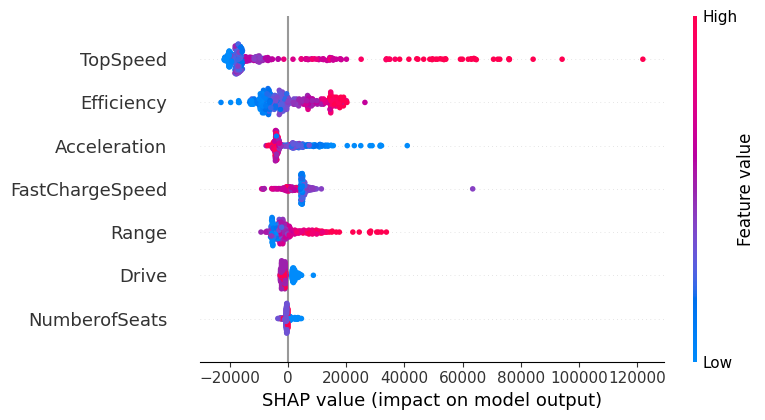

In [ ]:
import shap
feature_names = X.columns.tolist()

# Initialize SHAP explainer
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values_rf, X_train, feature_names=feature_names)

# Force plot for a single prediction
shap.initjs()

# Selecting a single row for force plot
sample_index = 0
shap.force_plot(explainer_rf.expected_value, shap_values_rf[sample_index, :], X_train.iloc[sample_index, :], feature_names=feature_names)

# Show the plot
plt.show()


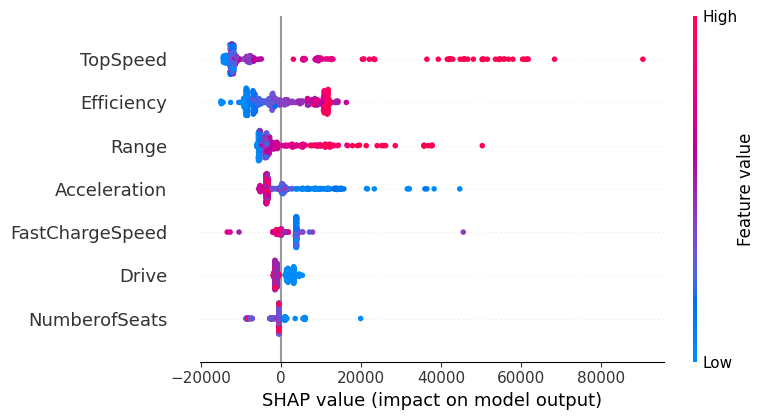

In [ ]:

# Initialize SHAP explainer for XGBoost model
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values_xgb, X_train, feature_names=feature_names)

# Force plot for a single prediction
shap.initjs()

# Selecting a single row for force plot
sample_index = 0
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[sample_index, :], X_train.iloc[sample_index, :], feature_names=feature_names)
# Show the plot
plt.show()


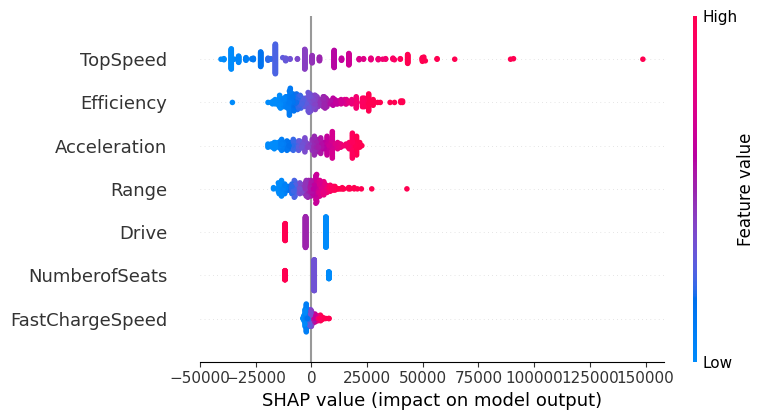

In [ ]:

# Initialize SHAP explainer for Linear model
explainer_linear = shap.LinearExplainer(linear_model, X_train)
shap_values_linear = explainer_linear.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values_linear, X_train, feature_names=feature_names)

# Force plot for a single prediction
shap.initjs()

# Selecting a single row for force plot
sample_index = 0
shap.force_plot(explainer_linear.expected_value, shap_values_linear[sample_index, :], X_train.iloc[sample_index, :], feature_names=feature_names)

# Show the plot
plt.show()


In [ ]:

from sklearn.tree import DecisionTreeRegressor
# Create the Decision Tree
dt_model  = DecisionTreeRegressor()
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Decision Tree:", grid_search.best_params_)

# Train the model with the best parameters
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the optimized model
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mean_squared_error(y_test, y_pred_best_dt))
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print("Optimized Decision Tree Results:")
print(f"MAE: {mae_best_dt:.2f}, RMSE: {rmse_best_dt:.2f}, R²: {r2_best_dt:.2f}")

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree Results:
MAE: 11584.63, RMSE: 18674.38, R²: 0.74


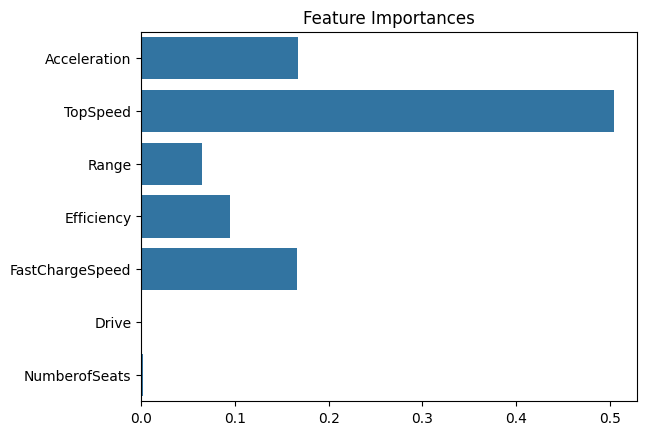

In [ ]:
# Get feature importances
importances = best_dt_model.feature_importances_

# Plot feature importances
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()
